## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9772296	total: 52.5ms	remaining: 52.5s
1:	learn: 0.9446052	total: 53.5ms	remaining: 26.7s
2:	learn: 0.9133242	total: 54.2ms	remaining: 18s
3:	learn: 0.8824793	total: 54.8ms	remaining: 13.6s
4:	learn: 0.8572609	total: 55.2ms	remaining: 11s
5:	learn: 0.8290322	total: 55.9ms	remaining: 9.26s
6:	learn: 0.8061598	total: 56.2ms	remaining: 7.97s
7:	learn: 0.7827702	total: 56.7ms	remaining: 7.03s
8:	learn: 0.7566379	total: 57.3ms	remaining: 6.31s
9:	learn: 0.7329276	total: 58ms	remaining: 5.74s
10:	learn: 0.7094982	total: 58.3ms	remaining: 5.24s
11:	learn: 0.6864036	total: 58.5ms	remaining: 4.82s
12:	learn: 0.6674702	total: 59.1ms	remaining: 4.49s
13:	learn: 0.6484519	total: 59.9ms	remaining: 4.22s
14:	learn: 0.6278600	total: 60.2ms	remaining: 3.96s
15:	learn: 0.6092561	total: 60.7ms	remaining: 3.73s
16:	learn: 0.5900883	total: 61.7ms	remaining: 3.56s
17:	learn: 0.5727586	total: 62.4ms	remaining: 3.4s
18:	learn: 0.5560034	total: 62.9ms	remaining: 3.25s
19:	learn: 0.5404492	total: 6

160:	learn: 0.0453170	total: 156ms	remaining: 811ms
161:	learn: 0.0450498	total: 157ms	remaining: 810ms
162:	learn: 0.0448023	total: 157ms	remaining: 808ms
163:	learn: 0.0446603	total: 158ms	remaining: 806ms
164:	learn: 0.0444341	total: 159ms	remaining: 806ms
165:	learn: 0.0442683	total: 160ms	remaining: 804ms
166:	learn: 0.0441033	total: 161ms	remaining: 801ms
167:	learn: 0.0439208	total: 161ms	remaining: 799ms
168:	learn: 0.0437532	total: 162ms	remaining: 796ms
169:	learn: 0.0435219	total: 162ms	remaining: 792ms
170:	learn: 0.0433689	total: 163ms	remaining: 792ms
171:	learn: 0.0432450	total: 164ms	remaining: 788ms
172:	learn: 0.0430328	total: 164ms	remaining: 786ms
173:	learn: 0.0429016	total: 165ms	remaining: 783ms
174:	learn: 0.0426759	total: 165ms	remaining: 779ms
175:	learn: 0.0425079	total: 166ms	remaining: 776ms
176:	learn: 0.0423739	total: 167ms	remaining: 777ms
177:	learn: 0.0422080	total: 167ms	remaining: 773ms
178:	learn: 0.0420615	total: 168ms	remaining: 769ms
179:	learn: 

228:	learn: 0.0355724	total: 199ms	remaining: 670ms
229:	learn: 0.0353846	total: 200ms	remaining: 671ms
230:	learn: 0.0352024	total: 202ms	remaining: 671ms
231:	learn: 0.0350316	total: 202ms	remaining: 670ms
232:	learn: 0.0349177	total: 203ms	remaining: 667ms
233:	learn: 0.0347680	total: 204ms	remaining: 667ms
234:	learn: 0.0347039	total: 204ms	remaining: 665ms
235:	learn: 0.0346451	total: 205ms	remaining: 664ms
236:	learn: 0.0345548	total: 206ms	remaining: 662ms
237:	learn: 0.0344686	total: 206ms	remaining: 660ms
238:	learn: 0.0343392	total: 207ms	remaining: 658ms
239:	learn: 0.0342813	total: 207ms	remaining: 656ms
240:	learn: 0.0342024	total: 208ms	remaining: 654ms
241:	learn: 0.0340612	total: 208ms	remaining: 652ms
242:	learn: 0.0339570	total: 208ms	remaining: 649ms
243:	learn: 0.0338416	total: 209ms	remaining: 646ms
244:	learn: 0.0337698	total: 209ms	remaining: 644ms
245:	learn: 0.0336217	total: 209ms	remaining: 641ms
246:	learn: 0.0335109	total: 210ms	remaining: 639ms
247:	learn: 

398:	learn: 0.0240091	total: 299ms	remaining: 450ms
399:	learn: 0.0239792	total: 301ms	remaining: 452ms
400:	learn: 0.0239124	total: 302ms	remaining: 451ms
401:	learn: 0.0238815	total: 303ms	remaining: 451ms
402:	learn: 0.0238527	total: 303ms	remaining: 449ms
403:	learn: 0.0237967	total: 304ms	remaining: 449ms
404:	learn: 0.0237635	total: 305ms	remaining: 448ms
405:	learn: 0.0237409	total: 305ms	remaining: 447ms
406:	learn: 0.0237114	total: 306ms	remaining: 446ms
407:	learn: 0.0236325	total: 306ms	remaining: 445ms
408:	learn: 0.0236018	total: 307ms	remaining: 444ms
409:	learn: 0.0235448	total: 307ms	remaining: 442ms
410:	learn: 0.0235170	total: 308ms	remaining: 441ms
411:	learn: 0.0234508	total: 308ms	remaining: 440ms
412:	learn: 0.0234209	total: 309ms	remaining: 439ms
413:	learn: 0.0233838	total: 310ms	remaining: 438ms
414:	learn: 0.0233363	total: 310ms	remaining: 437ms
415:	learn: 0.0232993	total: 311ms	remaining: 436ms
416:	learn: 0.0232731	total: 311ms	remaining: 435ms
417:	learn: 

473:	learn: 0.0213173	total: 341ms	remaining: 379ms
474:	learn: 0.0212793	total: 342ms	remaining: 378ms
475:	learn: 0.0212651	total: 343ms	remaining: 377ms
476:	learn: 0.0212251	total: 343ms	remaining: 376ms
477:	learn: 0.0211939	total: 344ms	remaining: 376ms
478:	learn: 0.0211670	total: 346ms	remaining: 376ms
479:	learn: 0.0211522	total: 346ms	remaining: 375ms
480:	learn: 0.0211318	total: 346ms	remaining: 374ms
481:	learn: 0.0210596	total: 347ms	remaining: 373ms
482:	learn: 0.0210341	total: 348ms	remaining: 372ms
483:	learn: 0.0209992	total: 348ms	remaining: 371ms
484:	learn: 0.0209887	total: 349ms	remaining: 370ms
485:	learn: 0.0209688	total: 349ms	remaining: 369ms
486:	learn: 0.0209478	total: 350ms	remaining: 368ms
487:	learn: 0.0209030	total: 350ms	remaining: 367ms
488:	learn: 0.0208690	total: 351ms	remaining: 366ms
489:	learn: 0.0208393	total: 351ms	remaining: 366ms
490:	learn: 0.0208154	total: 352ms	remaining: 365ms
491:	learn: 0.0207955	total: 352ms	remaining: 364ms
492:	learn: 

656:	learn: 0.0170483	total: 446ms	remaining: 233ms
657:	learn: 0.0170114	total: 447ms	remaining: 232ms
658:	learn: 0.0169811	total: 452ms	remaining: 234ms
659:	learn: 0.0169439	total: 453ms	remaining: 233ms
660:	learn: 0.0169294	total: 454ms	remaining: 233ms
661:	learn: 0.0169153	total: 455ms	remaining: 232ms
662:	learn: 0.0169062	total: 455ms	remaining: 231ms
663:	learn: 0.0168873	total: 456ms	remaining: 231ms
664:	learn: 0.0168778	total: 456ms	remaining: 230ms
665:	learn: 0.0168644	total: 456ms	remaining: 229ms
666:	learn: 0.0168410	total: 457ms	remaining: 228ms
667:	learn: 0.0168196	total: 457ms	remaining: 227ms
668:	learn: 0.0167930	total: 457ms	remaining: 226ms
669:	learn: 0.0167818	total: 458ms	remaining: 226ms
670:	learn: 0.0167598	total: 459ms	remaining: 225ms
671:	learn: 0.0167471	total: 459ms	remaining: 224ms
672:	learn: 0.0167273	total: 460ms	remaining: 223ms
673:	learn: 0.0167134	total: 460ms	remaining: 223ms
674:	learn: 0.0167053	total: 461ms	remaining: 222ms
675:	learn: 

723:	learn: 0.0159665	total: 488ms	remaining: 186ms
724:	learn: 0.0159496	total: 491ms	remaining: 186ms
725:	learn: 0.0159367	total: 492ms	remaining: 186ms
726:	learn: 0.0159226	total: 493ms	remaining: 185ms
727:	learn: 0.0159120	total: 493ms	remaining: 184ms
728:	learn: 0.0159017	total: 494ms	remaining: 183ms
729:	learn: 0.0158895	total: 494ms	remaining: 183ms
730:	learn: 0.0158773	total: 495ms	remaining: 182ms
731:	learn: 0.0158600	total: 495ms	remaining: 181ms
732:	learn: 0.0158540	total: 496ms	remaining: 181ms
733:	learn: 0.0158427	total: 496ms	remaining: 180ms
734:	learn: 0.0158353	total: 497ms	remaining: 179ms
735:	learn: 0.0158050	total: 499ms	remaining: 179ms
736:	learn: 0.0157829	total: 499ms	remaining: 178ms
737:	learn: 0.0157660	total: 500ms	remaining: 177ms
738:	learn: 0.0157504	total: 500ms	remaining: 177ms
739:	learn: 0.0157397	total: 500ms	remaining: 176ms
740:	learn: 0.0157259	total: 501ms	remaining: 175ms
741:	learn: 0.0157117	total: 502ms	remaining: 174ms
742:	learn: 

907:	learn: 0.0135353	total: 593ms	remaining: 60.1ms
908:	learn: 0.0135295	total: 595ms	remaining: 59.6ms
909:	learn: 0.0135192	total: 595ms	remaining: 58.9ms
910:	learn: 0.0135128	total: 596ms	remaining: 58.2ms
911:	learn: 0.0135019	total: 597ms	remaining: 57.6ms
912:	learn: 0.0134841	total: 597ms	remaining: 56.9ms
913:	learn: 0.0134743	total: 598ms	remaining: 56.2ms
914:	learn: 0.0134610	total: 598ms	remaining: 55.6ms
915:	learn: 0.0134585	total: 599ms	remaining: 54.9ms
916:	learn: 0.0134437	total: 599ms	remaining: 54.2ms
917:	learn: 0.0134342	total: 599ms	remaining: 53.5ms
918:	learn: 0.0134064	total: 599ms	remaining: 52.8ms
919:	learn: 0.0133936	total: 600ms	remaining: 52.1ms
920:	learn: 0.0133899	total: 600ms	remaining: 51.5ms
921:	learn: 0.0133875	total: 601ms	remaining: 50.8ms
922:	learn: 0.0133758	total: 601ms	remaining: 50.2ms
923:	learn: 0.0133633	total: 602ms	remaining: 49.5ms
924:	learn: 0.0133608	total: 602ms	remaining: 48.8ms
925:	learn: 0.0133400	total: 603ms	remaining: 

994:	learn: 0.0127238	total: 633ms	remaining: 3.18ms
995:	learn: 0.0127189	total: 635ms	remaining: 2.55ms
996:	learn: 0.0127059	total: 636ms	remaining: 1.91ms
997:	learn: 0.0126965	total: 636ms	remaining: 1.27ms
998:	learn: 0.0126924	total: 637ms	remaining: 637us
999:	learn: 0.0126765	total: 637ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.025632610877098314
ABC Pre-generator MAE 0.026746416175953903


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

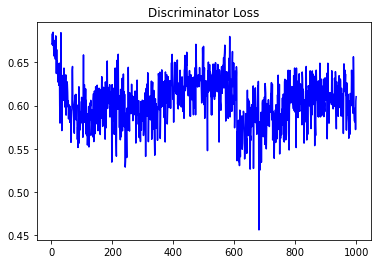

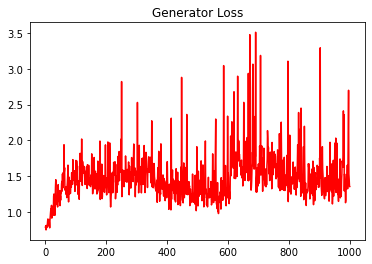

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.0650625068065408


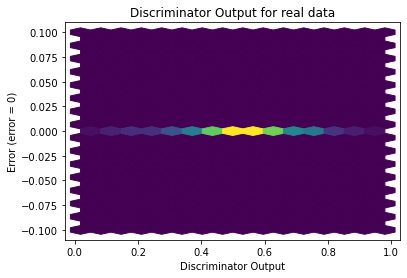

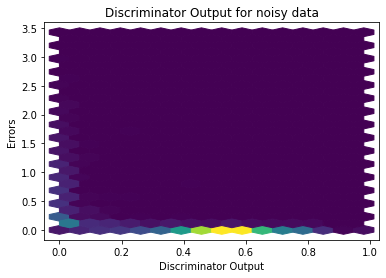

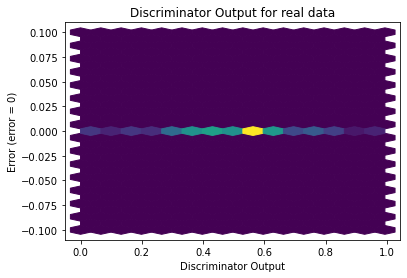

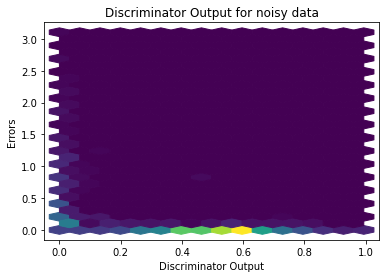

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


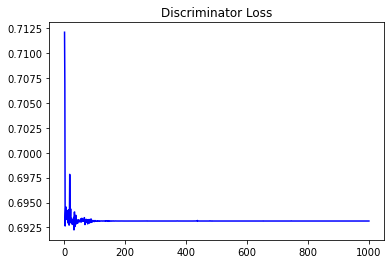

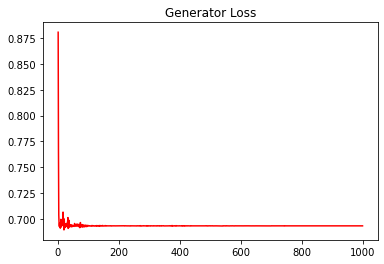

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.028744161447582694


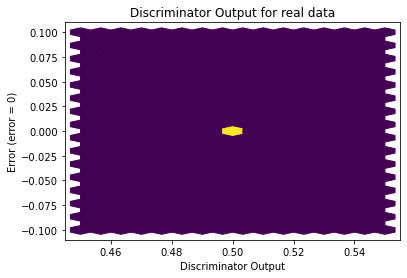

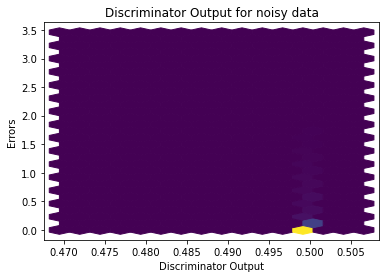

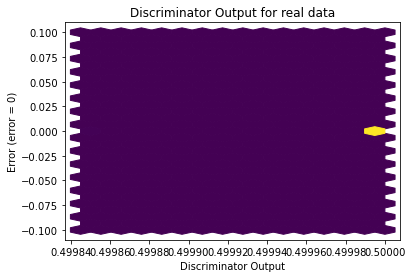

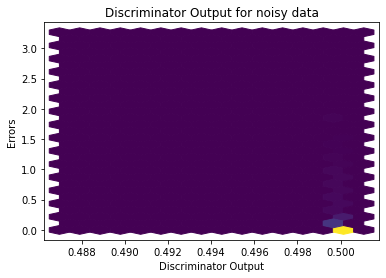

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


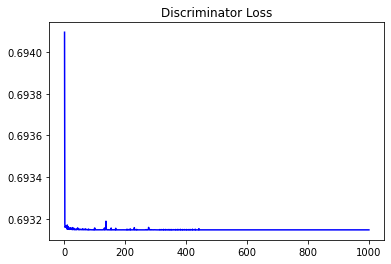

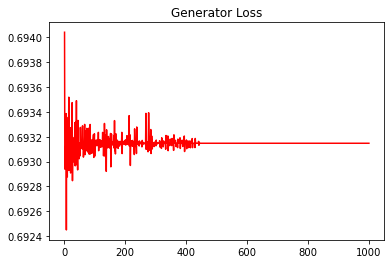

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.028498419570047166


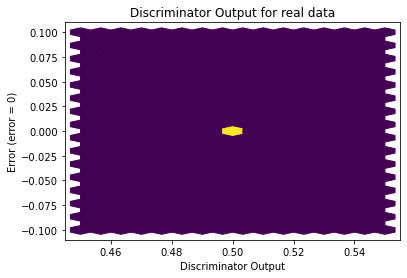

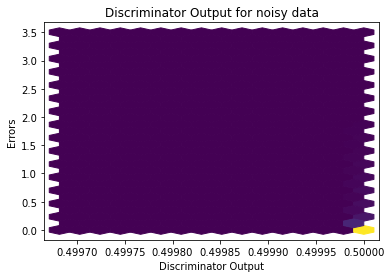

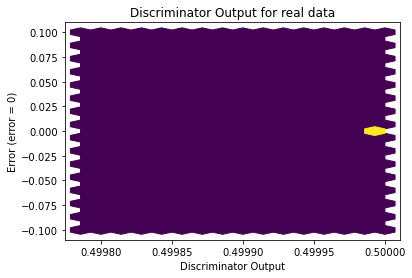

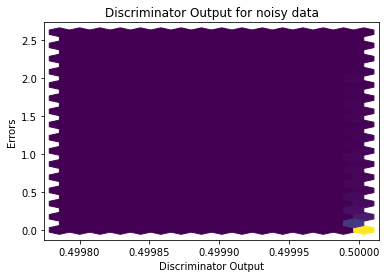

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0333]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0034]], requires_grad=True)
